In [116]:
import pandas as pd
import numpy as np
import seaborn as sns
from dash import Dash, dcc, html, Input, Output
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
import numpy as np
import statistics
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

df = pd.read_csv(r'D:\Code\SQL\Violence Against Women and Girls\violence_data.csv')

In [117]:
df.head()

,RecordID,Country,Gender,Demographics Question,Demographics Response,Question,Survey Year,Value
0,1,Afghanistan,F,Marital status,Never married,... if she burns the food,01/01/2015,NaN
1,1,Afghanistan,F,Education,Higher,... if she burns the food,01/01/2015,10.1
2,1,Afghanistan,F,Education,Secondary,... if she burns the food,01/01/2015,13.7
3,1,Afghanistan,F,Education,Primary,... if she burns the food,01/01/2015,13.8
4,1,Afghanistan,F,Marital status,"Widowed, divorced, separated",... if she burns the food,01/01/2015,13.8


In [118]:
# filtering year
df['year'] = pd.DatetimeIndex(df['Survey Year']).year
df['month'] = pd.DatetimeIndex(df['Survey Year']).month
df.head()

,RecordID,Country,Gender,Demographics Question,Demographics Response,Question,Survey Year,Value,year,month
0,1,Afghanistan,F,Marital status,Never married,... if she burns the food,01/01/2015,NaN,2015,1
1,1,Afghanistan,F,Education,Higher,... if she burns the food,01/01/2015,10.1,2015,1
2,1,Afghanistan,F,Education,Secondary,... if she burns the food,01/01/2015,13.7,2015,1
3,1,Afghanistan,F,Education,Primary,... if she burns the food,01/01/2015,13.8,2015,1
4,1,Afghanistan,F,Marital status,"Widowed, divorced, separated",... if she burns the food,01/01/2015,13.8,2015,1


In [119]:
# Eliminating unrequired columns i.e survey year and month
df.drop('Survey Year', axis=1, inplace=True) 
df.drop('month', axis=1, inplace=True)

In [120]:
# changing name from 'year' to "survey year"
df.rename({"year": "Survey Year"}, axis=1, inplace=True)

In [121]:
#identifyng null columns
for col in df.columns:
    missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(missing*100)))

RecordID - 0%
Country - 0%
Gender - 0%
Demographics Question - 0%
Demographics Response - 0%
Question - 0%
Value - 11%
Survey Year - 0%


In [122]:
#dropping null values
new_df = df.dropna(axis = 0)
print(new_df.isnull().sum(),'\n')

RecordID                 0
Country                  0
Gender                   0
Demographics Question    0
Demographics Response    0
Question                 0
Value                    0
Survey Year              0
dtype: int64 



In [123]:
for col in new_df.columns:
    missing = np.mean(new_df[col].isnull())
    print('{} - {}%'.format(col, round(missing*100)))

RecordID - 0%
Country - 0%
Gender - 0%
Demographics Question - 0%
Demographics Response - 0%
Question - 0%
Value - 0%
Survey Year - 0%


In [124]:
# calculating Mean of Violence cases per year
average_df = new_df.groupby(["Survey Year"])["Value"].agg(["max"]).reset_index()
average_df.columns = ['Survey Year', "Average"]
print('Violence per year')
average_df.sort_values(["Average"], ascending=False)

Violence per year


,Survey Year,Average
14,2015,86.9
3,2003,86.1
15,2016,85.2
17,2018,83.3
2,2002,82.8
13,2014,79.6
12,2013,77.1
5,2006,74.3
0,2000,72.6
16,2017,70.1


Text(0, 0.5, 'Survey Year')

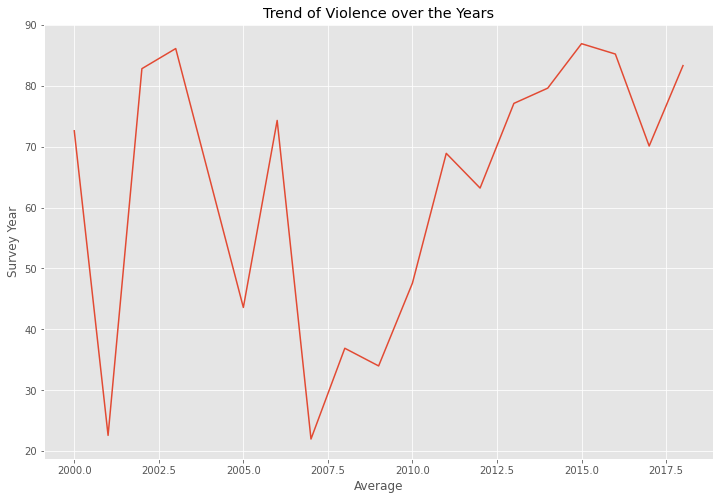

In [125]:
#visualization of the violence trend over the years
plt.plot(average_df['Survey Year'], average_df['Average'])
plt.title('Trend of Violence over the Years')
plt.xlabel('Average')
plt.ylabel('Survey Year')
#sns.regplot(x = 'budget', y = 'gross', data = demographics_df, line_kws={'color':'blue'})

In [126]:
#Calculating the Violence median per demographic group
response_df = new_df.groupby(["Demographics Response"])["Value"].agg(["median"]).reset_index()
response_df.columns = ["Response", "Median"]
print("Violence median per demographic group")
response_df.sort_values(["Median"], ascending=False)

#new_df.head()

Violence median per demographic group


,Response,Median
8,No education,21.55
4,Employed for kind,20.15
10,Rural,19.00
9,Primary,18.40
0,15-24,17.50
14,"Widowed, divorced, separated",17.15
7,Never married,14.90
3,Employed for cash,14.85
6,Married or living together,14.80
12,Unemployed,14.55


In [127]:
#visualization Violence median per demographic group
fig = px.pie(response_df, values='Median', names='Response', title='Violence median per Demographic group')
fig.show()

In [128]:
#Violence Rate per country 
country_df = new_df.groupby(["Country"])["Value"].agg(["median"]).reset_index()
average_df.columns = ['Country', "Median"]
print('Violence Rate per Country')
country_df.sort_values(["median"], ascending=False)

Violence Rate per Country


,Country,median
43,Morocco,48.90
20,Eritrea,48.70
59,Tajikistan,46.05
61,Timor-Leste,44.65
0,Afghanistan,44.50
...,...,...
58,South Africa,2.70
66,Ukraine,2.35
13,Colombia,1.60
52,Peru,1.25


In [129]:
#visualization of the violence rates in each country
fig = px.sunburst(country_df, path=['median', 'Country'], values='median',
                  color='median', hover_data=['median'])
fig.show()
#Morocco, followed by Eritrea have the highest rates over the years.

In [151]:
import plotly.io as pio

#Visualization of Maximum Violence rate per country per year

data = [dict(
  type = 'scatter',
  x = new_df["Country"],
  y = new_df['Survey Year'],
  mode = 'markers',
  transforms = [dict(
    type = 'aggregate',
    groups = new_df["Country"],
    aggregations = [dict(
        target = 'y', func = 'max', enabled = True),
    ]
  )]
)]

fig_dict = dict(data=data)

pio.show(fig_dict, validate=False)
